# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [ ]:
The data task is to analyze a dataset of 426,000 used cars, characterized by features such as year, manufacturer, model, condition, cylinders, fuel,
odometer, title_status, transmission, drive, size, type, and paint_color, to identify and quantify the attributes that most significantly influence the
target variable price.

In [ ]:
By applying statistical modeling, feature selection, and other relevant techniques, the objective is to develop a predictive model that accurately
estimates car prices based on these features.

In [ ]:
The resulting insights will provide actionable recommendations to a used car dealership, highlighting consumer-valued attributes to optimize pricing
strategies and align with market demand.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
To understand the used car dataset and identify quality issues, I would first inspect the data by reviewing a sample of rows and checking column data
types to ensure they align with expected data types, such as numeric for price and categorical for manufacturer.


In [ ]:
Next, I would analyze missing values to determine their extent and patterns, and examine summary statistics using describe() function to detect outliers.

In [ ]:
For categorical data, I would examine the frequency of unique values to get an idea on the dominant vs rare categories.

In [ ]:
By exploring these aspects, I can identify any quality issues within and ensure the dataset is reliable for modeling.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
from google.colab import drive;
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Creating a dataframe with the vehicles data
df = pd.read_csv('/content/drive/MyDrive/vehicles.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
#Examining first 5 rows
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
#Examining a sample of 5 rows (as most values are NaN above)
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
88631,7316146076,"washington, DC",26990,2015.0,audi,q5 tdi premium plus sport,good,6 cylinders,gas,45774.0,clean,other,WA1CMAFP0FA047053,NaN,NaN,other,brown,dc
40354,7309257727,monterey bay,451,2014.0,mercedes-benz,gl-class gl 550,NaN,8 cylinders,gas,47306.0,clean,automatic,4JGDF7DE7EA402058,4wd,NaN,SUV,NaN,ca
405061,7305245987,kennewick-pasco-richland,69999,2018.0,gmc,sierra duramax 3500 hd all,NaN,NaN,diesel,32824.0,clean,automatic,1GT42XCY2JF276507,4wd,NaN,truck,white,wa
399151,7311326582,southwest VA,42900,2013.0,ford,super duty f-250 srw,excellent,8 cylinders,diesel,145000.0,clean,automatic,1FT7W2BT2DEB73222,4wd,full-size,truck,black,va
265797,7301647149,albany,35590,2017.0,lincoln,navigator l select sport,good,6 cylinders,gas,76216.0,clean,automatic,5LMJJ3JT0HEL13925,4wd,NaN,SUV,white,ny


In [ ]:
#Examining statistics
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
#Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#Examining missing values count
df.isna().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [4]:
#Examining missing values proportion
df.isna().mean()

,0
id,0.000000
region,0.000000
price,0.000000
year,0.002823
manufacturer,0.041337
model,0.012362
condition,0.407852
cylinders,0.416225
fuel,0.007058
odometer,0.010307


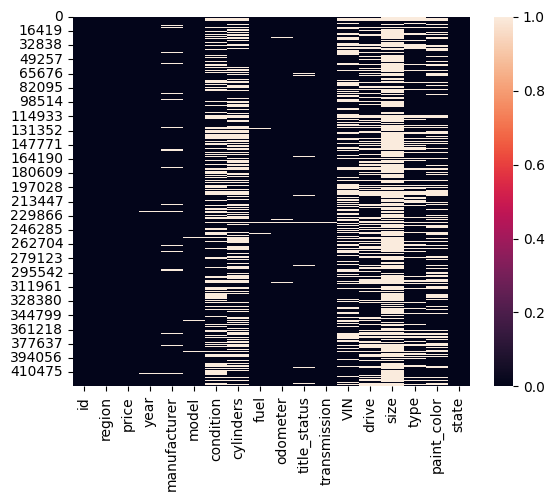

In [ ]:
sns.heatmap(df.isna());

In [5]:
#Dropping column with high missingness-size, ~72%, condition (40.79%), cylinders (41.62%), drive (30.59%)and low importance VIN ~38%
df = df.drop(['size', 'condition', 'cylinders', 'drive', 'VIN'], axis=1)
#Re-examining the table
df.head()

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
#Creating an 'unknown' category for high missing and other low missing categorical columns - paint_color (30.50%),
#type (21.75%); low missing - manufacturer (4.13%), model (1.24%)
df['paint_color'] = df['paint_color'].fillna('unknown')
df['type'] = df['type'].fillna('unknown')
df['manufacturer'] = df['manufacturer'].fillna('unknown')
df['model'] = df['model'].fillna('unknown')

# Verifying missing values are taken care of
print(df[['paint_color', 'type','manufacturer','model']].isna().sum())

#Re-examining the table
df.head()

paint_color     0
type            0
manufacturer    0
model           0
dtype: int64


,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color,state
0,7222695916,prescott,6000,NaN,unknown,unknown,NaN,NaN,NaN,NaN,unknown,unknown,az
1,7218891961,fayetteville,11900,NaN,unknown,unknown,NaN,NaN,NaN,NaN,unknown,unknown,ar
2,7221797935,florida keys,21000,NaN,unknown,unknown,NaN,NaN,NaN,NaN,unknown,unknown,fl
3,7222270760,worcester / central MA,1500,NaN,unknown,unknown,NaN,NaN,NaN,NaN,unknown,unknown,ma
4,7210384030,greensboro,4900,NaN,unknown,unknown,NaN,NaN,NaN,NaN,unknown,unknown,nc


In [7]:
#Imputing with mode for missing values in columns - fuel, title status and transmission
for col in ['fuel', 'transmission', 'title_status']:
    mode_value = df[col].mode()[0]  # Get the most frequent value
    df[col] = df[col].fillna(mode_value)

print(df[['fuel', 'transmission', 'title_status']].isna().sum())

fuel            0
transmission    0
title_status    0
dtype: int64


In [8]:
#Deleting rows from df where either the year or odometer column has a missing value (small percentage of missingness)
df = df.dropna(subset=['year', 'odometer'])

In [9]:
#Examining missing values count
df.isna().sum()

,0
id,0
region,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0


In [ ]:
df.sample(5)

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color,state
165407,7314454186,"kansas city, MO",6995,2012.0,hyundai,sonata,gas,114385.0,clean,automatic,sedan,unknown,ks
100439,7307621892,jacksonville,15499,2018.0,honda,civic,gas,33783.0,clean,automatic,sedan,silver,fl
340505,7316265751,williamsport,6100,2006.0,bmw,325 xi awd,gas,127000.0,clean,automatic,sedan,silver,pa
163868,7310405491,waterloo / cedar falls,7979,2011.0,toyota,sienna,gas,224341.0,clean,automatic,mini-van,green,ia
19760,7312553249,little rock,21831,2016.0,audi,a3 e-tron,hybrid,38561.0,clean,automatic,hatchback,black,ar


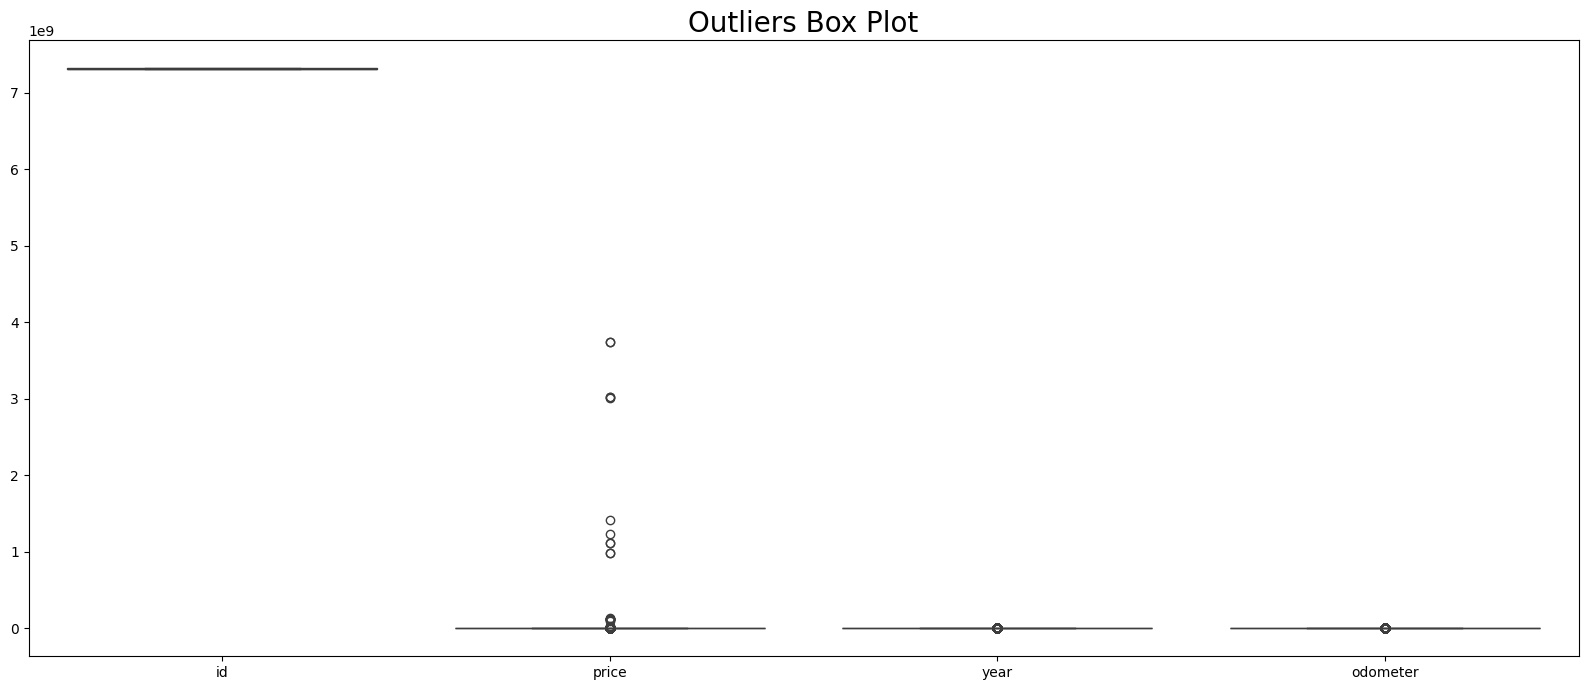

In [ ]:
# looking for outliers using box plot
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.title("Outliers Box Plot", size = 20)
plt.show()

In [ ]:
#Examining year values
df['year'].describe()

,year
count,421344.000000
mean,2011.225244
std,9.463345
min,1900.000000
25%,2008.000000
50%,2013.000000
75%,2017.000000
max,2022.000000


In [10]:
#Examining odometer column
df['odometer'].describe()

,odometer
count,4.213440e+05
mean,9.822513e+04
std,2.141207e+05
min,0.000000e+00
25%,3.795100e+04
50%,8.582750e+04
75%,1.338000e+05
max,1.000000e+07


In [11]:
# Using provided values to get count of outliers and remove them (from odometer)

lower_bound = 0  # Adjusted for non-negative prices
upper_bound = 300000 #keep upper bound to 300,000 to eliminate outliers/errors

# Identify outliers
outliers = df[(df['odometer'] < lower_bound) | (df['odometer'] > upper_bound)]

# Count outliers
outlier_count = len(outliers)
print(outlier_count)

# Removing outliers
df = df[(df['odometer'] >= lower_bound) & (df['odometer'] <= upper_bound)]

3016


In [12]:
#Examining target column - 'price' values
df['price'].describe()

,price
count,4.183280e+05
mean,7.110865e+04
std,1.211223e+07
min,0.000000e+00
25%,5.990000e+03
50%,1.399000e+04
75%,2.650000e+04
max,3.736929e+09


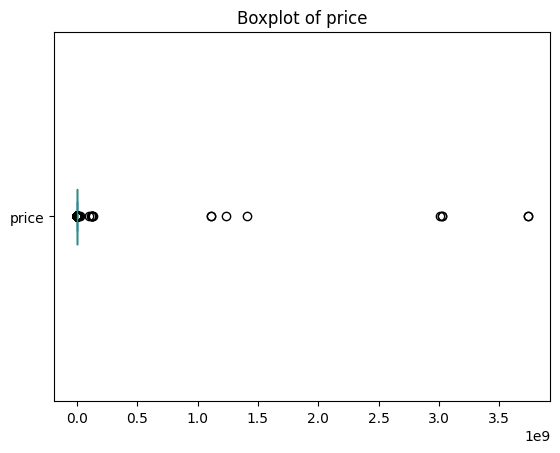

In [ ]:
#Examining outliers
df['price'].plot(kind = 'box', vert = False, title = "Boxplot of price");

In [13]:
# Using provided values to get count of outliers and remove them

lower_bound = 0  # Adjusted for non-negative prices
upper_bound = 100000 #keep upper bound to $100K to eliminate niche subset and outliers/errors

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Count outliers
outlier_count = len(outliers)
print(outlier_count)

# Removing outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

#Removing 0s
df = df[df['price'] > 0]

630


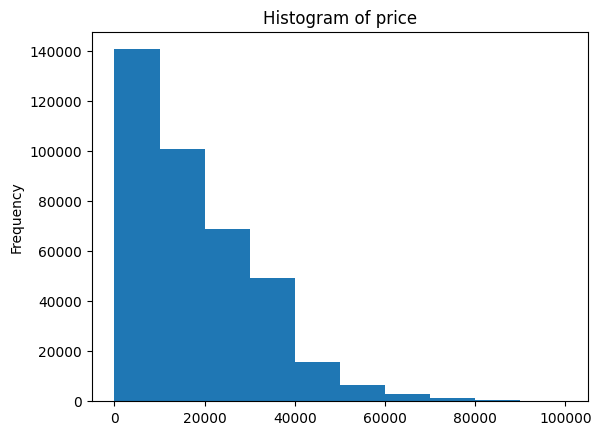

In [ ]:
#Examining histogram of 'price'
df['price'].plot(kind = 'hist', bins = 10, title = "Histogram of price");

In [14]:
#Converting year and odometer to int types
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)

#Examining the data
df.head()

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color,state
27,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,gas,57923,clean,other,pickup,white,al
28,7316814758,auburn,22590,2010,chevrolet,silverado 1500,gas,71229,clean,other,pickup,blue,al
29,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,gas,19160,clean,other,pickup,red,al
30,7316743432,auburn,30990,2017,toyota,tundra double cab sr,gas,41124,clean,other,pickup,red,al
31,7316356412,auburn,15000,2013,ford,f-150 xlt,gas,128000,clean,automatic,truck,black,al


In [15]:
df.shape

(387135, 13)

In [16]:
#Examining unique values for each column
{col: df[col].nunique() for col in df.select_dtypes(include=['category', 'object']).columns}

{'region': 404,
 'manufacturer': 43,
 'model': 27360,
 'fuel': 5,
 'title_status': 6,
 'transmission': 3,
 'type': 14,
 'paint_color': 13,
 'state': 51}

In [ ]:
print(df['region'].value_counts())

region
columbus               3390
jacksonville           3170
new hampshire          2932
grand rapids           2930
milwaukee              2911
                       ... 
meridian                 22
southwest MS             12
kansas city              10
west virginia (old)       8
fort smith, AR            8
Name: count, Length: 404, dtype: int64


In [ ]:
print(df['title_status'].value_counts())

title_status
clean         376704
rebuilt         7023
salvage         3823
lien            1415
missing          785
parts only       188
Name: count, dtype: int64


In [ ]:
print(df['fuel'].value_counts())

fuel
gas         329385
other        28004
diesel       26065
hybrid        4867
electric      1617
Name: count, dtype: int64


In [ ]:
print(df['transmission'].value_counts())

transmission
automatic    304868
other         61420
manual        23650
Name: count, dtype: int64


In [ ]:
print(df['type'].value_counts())

type
unknown        85164
sedan          79526
SUV            69654
pickup         40699
truck          30568
other          19739
coupe          17900
hatchback      15870
wagon          10014
van             7862
convertible     7324
mini-van        4527
offroad          593
bus              498
Name: count, dtype: int64


In [ ]:
print(df['state'].value_counts())

state
ca    44298
fl    27037
tx    21281
ny    17854
oh    16585
mi    16383
or    14038
pa    12772
nc    12504
wa    12275
wi    11152
tn    10456
co    10291
il     9798
nj     9315
va     8664
id     8231
az     8071
ma     7930
ia     7781
mn     7299
ga     6274
mt     5961
ks     5936
sc     5625
ok     5579
in     5489
ct     5042
al     4641
md     4340
ky     4056
mo     3915
nm     3801
ak     3413
ar     3243
nv     2966
nh     2932
me     2749
la     2737
hi     2701
dc     2646
vt     2459
ri     2280
sd     1232
ut     1119
wv      996
ne      983
ms      955
de      892
wy      572
nd      389
Name: count, dtype: int64


In [ ]:
print(df['paint_color'].value_counts())

paint_color
unknown    115759
white       72077
black       57915
silver      39731
blue        29222
red         28592
grey        22538
green        7028
custom       6403
brown        6165
yellow       2007
orange       1835
purple        666
Name: count, dtype: int64


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

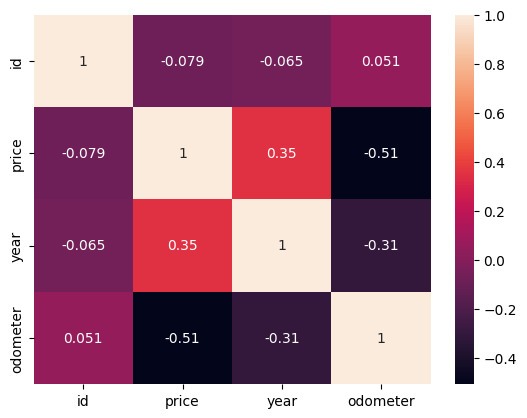

In [17]:
#looking at correlations between numeric values using a heatmap
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True);

Linear Regression:

In [18]:
#Model 1
#Defining X and y
X = pd.get_dummies(df[['year', 'manufacturer', 'fuel', 'odometer', 'title_status', 'transmission', 'type', 'paint_color', 'state']])
y = df['price']

# splitting data into training asnd test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#fitting the train data
lr = LinearRegression()
lr.fit(X_train, y_train)

#prediction of model
y_pred = lr.predict(X_test)

#computing mse
mse = mean_squared_error(y_test, y_pred)

In [19]:
#printig mse
print(mse)

#model accuracy on train data
print(lr.score(X_train, y_train))

#model accuracy on test data
print(lr.score(X_test, y_test))

94394261.13520578
0.5484581534321666
0.5449027450625972


In [ ]:
# Examining coefficients
#Getting feature names from X
feature_names = X.columns

# Getting coefficients from fitted model
coefs = lr.coef_

# Printing coefficients
for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef:.4f}")

year: 307.0434
odometer: -0.1044
manufacturer_acura: -1324.9397
manufacturer_alfa-romeo: 2689.2078
manufacturer_aston-martin: 11920.5240
manufacturer_audi: 1860.9320
manufacturer_bmw: -992.9373
manufacturer_buick: -4725.9487
manufacturer_cadillac: 76.1235
manufacturer_chevrolet: -1214.2462
manufacturer_chrysler: -5956.8718
manufacturer_datsun: 6211.9615
manufacturer_dodge: -3875.3603
manufacturer_ferrari: 41149.3434
manufacturer_fiat: -11523.8180
manufacturer_ford: -1248.9605
manufacturer_gmc: 1105.3844
manufacturer_harley-davidson: -13731.9731
manufacturer_honda: -4065.6929
manufacturer_hyundai: -7111.9369
manufacturer_infiniti: -579.7140
manufacturer_jaguar: 926.3290
manufacturer_jeep: -1306.8166
manufacturer_kia: -7793.9407
manufacturer_land rover: -2344.1853
manufacturer_lexus: 2311.4248
manufacturer_lincoln: -233.5984
manufacturer_mazda: -6518.6459
manufacturer_mercedes-benz: 623.5237
manufacturer_mercury: -4886.8843
manufacturer_mini: -6262.2587
manufacturer_mitsubishi: -9493.339

Ridge Regression:

In [20]:
#Model 2
#Defining X and y
X = pd.get_dummies(df[['year', 'manufacturer', 'fuel', 'odometer', 'title_status', 'transmission', 'type', 'paint_color', 'state']])
y = df['price']

# splitting data into training asnd test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#fitting the train data
ridge = Ridge()
ridge.fit(X_train, y_train)

#prediction of model
y_pred = ridge.predict(X_test)

In [21]:
#computing mse
mse = mean_squared_error(y_test, y_pred)

#printing mse
print(mse)

#model accuracy on train data
print(ridge.score(X_train, y_train))

#model accuracy on test data
print(ridge.score(X_test, y_test))

94378978.44516078
0.5484536399349887
0.5449764265576785


LASSO Regression on scaled numeric values

In [22]:
#Model 3
#Scaling numerical columns before one-hot encoding
num_cols = ['year', 'odometer']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

#Redefining X with scaled data
X = pd.get_dummies(df_scaled[['year', 'manufacturer', 'fuel', 'odometer', 'title_status', 'transmission', 'type', 'paint_color', 'state']])
y = df['price']

# splitting data into training asnd test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Fitting the LASSO model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

#Prediction of model
y_pred_lasso = lasso.predict(X_test)

In [23]:
#computing mse
mse = mean_squared_error(y_test, y_pred)

#printing mse
print(mse)

#Model accuracy on train data (R² score)
print(lasso.score(X_train, y_train))

#Model accuracy on test data (R² score)
print(lasso.score(X_test, y_test))

94378978.44516078
0.5482134862660156
0.5446378933226861


Using different combination of features - linear regression

In [24]:
#Model 4
#Defining X and y
X = pd.get_dummies(df[['year', 'manufacturer','odometer']])
y = df['price']

# splitting data into training asnd test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#fitting the train data
lr = LinearRegression()
lr.fit(X_train, y_train)

#prediction of model
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

#model accuracy on train data
print(lr.score(X_train, y_train))

#model accuracy on test data
print(lr.score(X_test, y_test))

124117305.8659555
0.4061808616077055
0.40160085464395634


In [25]:
#Model 5
#Defining X and y
X = pd.get_dummies(df[['year', 'odometer']])
y = df['price']

# splitting data into training asnd test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#fitting the train data
lr = LinearRegression()
lr.fit(X_train, y_train)

#prediction of model
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

#model accuracy on train data
print(lr.score(X_train, y_train))

#model accuracy on test data
print(lr.score(X_test, y_test))

146012502.6233937
0.2993842523349579
0.2960388869905216


In [ ]:
#Model 6
#Defining X and y
X = pd.get_dummies(df[['year']])
y = df['price']

# splitting data into training asnd test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#fitting the train data
lr = LinearRegression()
lr.fit(X_train, y_train)

#prediction of model
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

#model accuracy on train data
print(lr.score(X_train, y_train))

#model accuracy on test data
print(lr.score(X_test, y_test))

183239489.06170407
0.12135157682324127
0.11655870319629502


Based on the above model and their results, I decided to use the LASSO regression model and try out some variations in feature selection, changing the degree and hyperparameter (alpha values) below:

LASSO with PolynomialFeatures and OneHotEncoder

In [ ]:
#Model 7
#Defining X and y
X = df[['year', 'manufacturer', 'odometer']]
y = df['price']

#Defining numerical and categorical columns
num_cols = ['year', 'odometer']
cat_cols = ['manufacturer']

#Creating preprocessor with PolynomialFeatures for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

#Defining LASSO pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1, random_state=42))
])

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#Fit and evaluate
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('mse:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

train_r2 = r2_score(y_train, pipe.predict(X_train))
test_r2 = r2_score(y_test, pipe.predict(X_test))
print('Train R2:', train_r2, 'Test R²:', test_r2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+13, tolerance: 5.670e+09
  model = cd_fast.enet_coordinate_descent(


mse: 119929661.46086846
r2: 0.42179048747215686
Train R2: 0.4273511886956324 Test R²: 0.42179048747215686


In [ ]:
#Model 8
# Defining X and y - trying a different combination of features
X = df[['year', 'manufacturer', 'fuel', 'odometer',
        'title_status', 'transmission', 'type', 'paint_color', 'state']]
y = df['price']

# Defining numerical and categorical columns
num_cols = ['year', 'odometer']
cat_cols = ['manufacturer', 'fuel', 'title_status',
            'transmission', 'type', 'paint_color', 'state']

# Creating preprocessor with PolynomialFeatures for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

# Defining LASSO pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1, random_state=42))
])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Fit and evaluate
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

# Print r2 for train and test
train_r2 = r2_score(y_train, pipe.predict(X_train))
test_r2 = r2_score(y_test, pipe.predict(X_test))
print('Train R2:', train_r2, 'Test R²:', test_r2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+13, tolerance: 5.670e+09
  model = cd_fast.enet_coordinate_descent(


MSE: 92167311.15167841
R²: 0.5556394022724518
Train R2: 0.5602301564409777 Test R²: 0.5556394022724518


In [ ]:
#Model 9
# Defining X and y - trying a different combination of features
X = df[['year', 'manufacturer', 'fuel', 'odometer',
        'title_status', 'transmission', 'type', 'paint_color', 'state']]
y = df['price']

# Defining numerical and categorical columns
num_cols = ['year', 'odometer']
cat_cols = ['manufacturer', 'fuel', 'title_status',
            'transmission', 'type', 'paint_color', 'state']

# Creating preprocessor with PolynomialFeatures for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=3, include_bias=False)),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

# Defining LASSO pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1, random_state=42))
])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Fit and evaluate
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

# Print r2 for train and test
train_r2 = r2_score(y_train, pipe.predict(X_train))
test_r2 = r2_score(y_test, pipe.predict(X_test))
print('Train R2:', train_r2, 'Test R²:', test_r2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+13, tolerance: 5.670e+09
  model = cd_fast.enet_coordinate_descent(


MSE: 91144455.4861005
R²: 0.5605708334845136
Train R2: 0.5649452075019596 Test R²: 0.5605708334845136


The above model is so far the best one I have.

Using GridsearchCV to examine ideal hyperparameters

In [ ]:
#Model 10
# Defining X and y
X = df[['year', 'odometer']]
y = df['price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Definng pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid
params_dict = {'ridge__alpha': [0.1, 1.0, 10.0]}

# Perform GridSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

grid = GridSearchCV(pipe, param_grid=params_dict, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Get best parameters
best_alpha = grid.best_params_

# Predict
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)

# Calculate MSE and R²
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Answer check
print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Train R²: {train_r2:.3f}')
print(f'Test R²: {test_r2:.3f}')
print(f'Best Alpha: {best_alpha["ridge__alpha"]}')

Train MSE: 146580769.59
Test MSE: 146012463.52
Train R²: 0.299
Test R²: 0.296
Best Alpha: 10.0


Repeating previous model with alpha = 10

(computationally very expensive to use gridsearchcv on this model; keeps crashing)

In [ ]:
#Model 11
#alpha = 10
# Defining X and y - trying a different combination of features
X = df[['year', 'manufacturer', 'fuel', 'odometer',
        'title_status', 'transmission', 'type', 'paint_color', 'state']]
y = df['price']

# Defining numerical and categorical columns
num_cols = ['year', 'odometer']
cat_cols = ['manufacturer', 'fuel', 'title_status',
            'transmission', 'type', 'paint_color', 'state']

# Creating preprocessor with PolynomialFeatures for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=3, include_bias=False)),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

# Defining LASSO pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=10, random_state=42))
])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Fit and evaluate
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

# Print r2 for train and test
train_r2 = r2_score(y_train, pipe.predict(X_train))
test_r2 = r2_score(y_test, pipe.predict(X_test))
print('Train R2:', train_r2, 'Test R²:', test_r2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.526e+12, tolerance: 5.670e+09
  model = cd_fast.enet_coordinate_descent(


MSE: 92989662.12490685
R²: 0.5516746520216361
Train R2: 0.5567164732589152 Test R²: 0.5516746520216361


In [26]:
#Model 12
#alpha = 1
# Defining X and y - trying a different combination of features
X = df[['year', 'manufacturer', 'fuel', 'odometer',
        'title_status', 'transmission', 'type', 'paint_color', 'state']]
y = df['price']

# Defining numerical and categorical columns
num_cols = ['year', 'odometer']
cat_cols = ['manufacturer', 'fuel', 'title_status',
            'transmission', 'type', 'paint_color', 'state']

# Creating preprocessor with PolynomialFeatures for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('poly', PolynomialFeatures(degree=3, include_bias=False)),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

# Defining LASSO pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=1, random_state=42))
])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Fit and evaluate
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

# Print r2 for train and test
train_r2 = r2_score(y_train, pipe.predict(X_train))
test_r2 = r2_score(y_test, pipe.predict(X_test))
print('Train R2:', train_r2, 'Test R²:', test_r2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+13, tolerance: 5.670e+09
  model = cd_fast.enet_coordinate_descent(


MSE: 91294591.37787023
R²: 0.5598469925286094
Train R2: 0.5644082113939675 Test R²: 0.5598469925286094


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Model #9 from the above table is the recommended model. This uses the features - ‘year', 'manufacturer', 'fuel', 'odometer', 'title_status', 'transmission', 'type', 'paint_color', 'state’ to predict the target value ‘price’ for the used car. 12 different models were run and this model has the lowest error, MSE of 91144455.48 and R2 values for train and test were 0.56 and 0.56 respectively which show that there is no significant overfitting.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Business Understanding: The data task is to analyze a dataset of 426,000 used cars, characterized by features such as year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, drive, size, type, and paint_color, to identify and quantify the attributes that most significantly influence the target variable price. By applying statistical modeling, feature selection, and other relevant techniques, the objective is to develop a predictive model that accurately estimates car prices based on these features. The resulting insights will provide actionable recommendations to a used car dealership, highlighting consumer-valued attributes to optimize pricing strategies and align with market demand.

Data Understanding: To understand the used car dataset and identify quality issues, I would first inspect the data by reviewing a sample of rows and checking column data types to ensure they align with expected data types, such as numeric for price and categorical for manufacturer. Next, I would analyze missing values to determine their extent and patterns, and examine summary statistics using describe() function to detect outliers. For categorical data, I would examine the frequency of unique values to get an idea on the dominant vs rare categories. By exploring these aspects, I can identify any quality issues within and ensure the dataset is reliable for modeling.

Data Preparation: After examining the data, checking for missing values and duplicate values, columns with high missingness-size (about 72%), condition (40.79%), cylinders (41.62%), drive (30.59%)and low importance VIN ~38% were dropped, an 'unknown' category was created for high missing - paint_color (30.50%), type (21.75%); and and some low missing categorical columns - manufacturer (4.13%), model (1.24%). Other columns - fuel, title status and transmission were imputed with mode for missing values (<2% missingness). Rows were delete where either the year or odometer column has a missing value (about 1% missingness). Next, the odometer values above 300000 were removed as these values are unrealistic and mostly errors. Similarly, price values of 0s and those above 100000 were removed as these either belong to a niche subset or are errors/outliers.

Modeling: Correlations were observed for numeric values using a heat map. As expected there were positive and negative correlations with year and odometer respectively - a low positive correlation with year (0.35) and an even lower negative correlation with odometer (-0.51) were observed. Several different regression models were examined, coefficients were studied – there were no 0 values and features were selected based on the coefficients. GridsearchCV was utilized to get the best alpha value. Model was fine-tuned based on previous model results.

Evaluation: Model #9 from the above table is the recommended model. This uses the features - ‘year', 'manufacturer', 'fuel', 'odometer', 'title_status', 'transmission', 'type', 'paint_color', 'state’ to predict the target value ‘price’ for the used car. 12 different models were run and this model has the lowest error, MSE of 91144455.48 and R2 values for train and test were 0.56 and 0.56 respectively which show that there is no significant overfitting.